Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [9]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import sqlite3
import pandas as pd
from collections import Counter

db_filename = '/course/data/CSE-578/dinofunworld.db'
conn = sqlite3.connect(db_filename) 
c = conn.cursor()

### **Question 1:**
Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

Your distance function should count the number of dissimilarities in the sequences without considering any other factors.

**Note** 
* The distance matrix should be reported as a dictionary of dictionaries (eg. {1: {2:0, 3:0, 4:0}, 2: {1:0, 3:0, ...}, ...}).
* The order of the output is not important.

In [10]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
d = {165316:{1835254:0, 296394:0, 404385:0, 448990:0},
     1835254:{165316:0, 296394:0, 404385:0, 448990:0},
     296394:{165316:0, 1835254:0, 404385:0, 448990:0},
     404385:{165316:0, 1835254:0, 296394:0, 448990:0},
     448990:{165316:0, 1835254:0, 296394:0, 404385:0}}
c.execute("SELECT visitorID, sequence FROM sequences WHERE visitorID IN (165316, 1835254, 296394, 404385, 448990)")
rows = c.fetchall()
data = {}
for i in rows:
    data[i[0]] = i[1].split('-')

for i in d:
    for j in d[i]:
        for k in range(len(data[i])):
            if data[i][k] != data[j][k]:
                d[i][j] += 1
print(d)

{165316: {1835254: 336, 296394: 318, 404385: 329, 448990: 318}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}, 296394: {165316: 318, 1835254: 282, 404385: 303, 448990: 0}, 404385: {165316: 329, 1835254: 298, 296394: 303, 448990: 303}, 448990: {165316: 318, 1835254: 282, 296394: 0, 404385: 303}}


### **Question 2:**  
Create and display a Parallel Coordinate Plot displaying the minimum, maximum and average attendance for each ride in the park.

For this question, display a Parallel Coordinate Plot in the notebook and print the data used to create a Parallel Coordinate Plot as a dictionary of dictionaries (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... })

**Note:** 
* Not all attractions are rides.
* The output should be a dictionary and the order of the output is not important.
* Use the parallel coordinates function from the **pandas library** to generate the graph.
* The Parallel Coordinate plot must have the below mentioned parameters,
    * legend and it should be outside the plot.
    * y-label ('**Attendance**')
    * title named '**Ride Attendance - Minimum, Maximum, Average**'
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels

{'Wrightiraptor Mountain': {'min': 1, 'max': 158, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1, 'max': 261, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1, 'max': 640, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2, 'max': 424, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5, 'max': 491, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2, 'max': 206, 'avg': 64.39756944444444}, 'Firefall': {'min': 1, 'max': 576, 'avg': 233.46875}, 'Atmosfear': {'min': 5, 'max': 335, 'avg': 126.359375}, 'North Line': {'min': 1, 'max': 166, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1, 'max': 112, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1, 'max': 148, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1, 'max': 98, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1, 'max': 72, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1, 'max': 93, 'avg': 13.869791666666666}, 'Enchanted Toadstools': {'min': 1, 'max': 77, 'avg': 12.864583333333334}, 

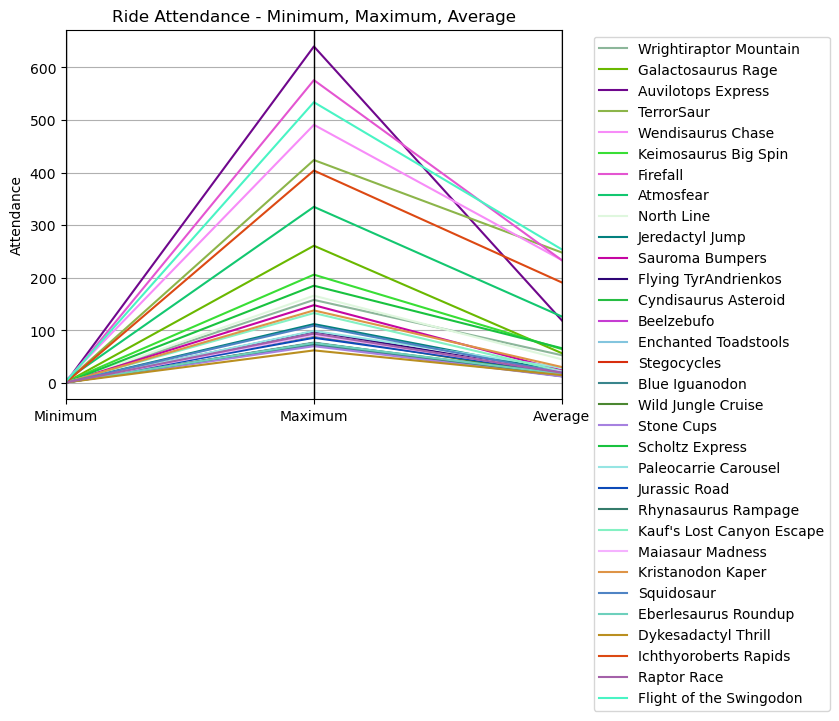

In [11]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
c.execute("SELECT AttractionID, Name FROM attraction WHERE Category LIKE '%ride%';")
attractions_data = c.fetchall()

# Query to get sequences
c.execute("SELECT visitorID, sequence FROM sequences;")
sequences_data = c.fetchall()

# Process attractions data
names, rideSeq = {}, {}
for attractionID, name in attractions_data:
    names[attractionID] = name
    rideSeq[attractionID] = Counter()

# Process sequences data
for visitorID, sequence in sequences_data:
    sequence_list = sequence.split('-')
    for ind, j in enumerate(sequence_list):
        j = int(j)
        if j in rideSeq:
            rideSeq[j][ind] += 1

# Calculating minimum, maximum, and average
minn, maxx, avg, rides = [], [], [], []


data_for_df = []
ans = {}

for k, v in rideSeq.items():
    rides.append(names[k])
    ans[names[k]] = {'min' : 0, 'max' : 0, 'avg' : 0}
    values = list(v.values())
    min_val = min(values)
    ans[names[k]]['min'] = min_val

    max_val = max(values)
    ans[names[k]]['max'] = max_val

    avg_val = sum(values) / 576
    ans[names[k]]['avg'] = avg_val
    
    data_for_df.append({'Ride': names[k], 'Minimum': min_val, 'Maximum': max_val, 'Average': avg_val})

df = pd.DataFrame(data_for_df)

# Visualization using matplotlib
# for ride, min_val, max_val, avg_val in zip(rides, minn, maxx, avg):
#     plt.plot(['Minimum', 'Maximum', 'Average'], [min_val, max_val, avg_val], label=ride)
print(ans)
parallel_coordinates(df, class_column = 'Ride')
plt.title('Ride Attendance - Minimum, Maximum, Average')
plt.ylabel('Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Question 3:**
Create and display a Scatterplot Matrix displaying the minimum, maximum and average attendance for each ride in the park.


**Note:** 
* Print the output values of Question 2 as the same data will be used for Scatterplot.
* The output should be a dictionary (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... }) and the order of the output is not important.
* This is a different view into the same data as the previous part. Use the scatter plot matrix function from the **pandas library** to generate the graph.
* While you work on these plots, consider the different things that each chart says about the data.
* The Scatterplot must have the below mentioned parameters,
    * title named ' **Scatterplot Matrix - Minimum, Maximum, Average Attendance** '
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

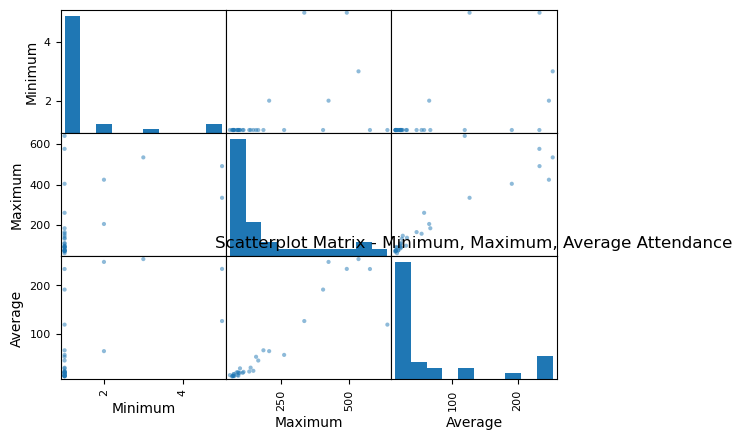

{'Wrightiraptor Mountain': {'min': 1, 'max': 158, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1, 'max': 261, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1, 'max': 640, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2, 'max': 424, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5, 'max': 491, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2, 'max': 206, 'avg': 64.39756944444444}, 'Firefall': {'min': 1, 'max': 576, 'avg': 233.46875}, 'Atmosfear': {'min': 5, 'max': 335, 'avg': 126.359375}, 'North Line': {'min': 1, 'max': 166, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1, 'max': 112, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1, 'max': 148, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1, 'max': 98, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1, 'max': 72, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1, 'max': 93, 'avg': 13.869791666666666}, 'Enchanted Toadstools': {'min': 1, 'max': 77, 'avg': 12.864583333333334}, 

In [12]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
pd.plotting.scatter_matrix(df, alpha=0.5)
plt.title('Scatterplot Matrix - Minimum, Maximum, Average Attendance')
plt.show()

print(ans)